In [18]:
from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM, Bidirectional
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd
import tensorflow as tf 

from keras.preprocessing import text as keras_text, sequence as keras_seq

In [2]:
data = pd.read_csv('train_data.csv')
pd.set_option('display.max_colwidth',80)
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) d...,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


# Checking Output class label difference

In [3]:
data['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

<AxesSubplot: >

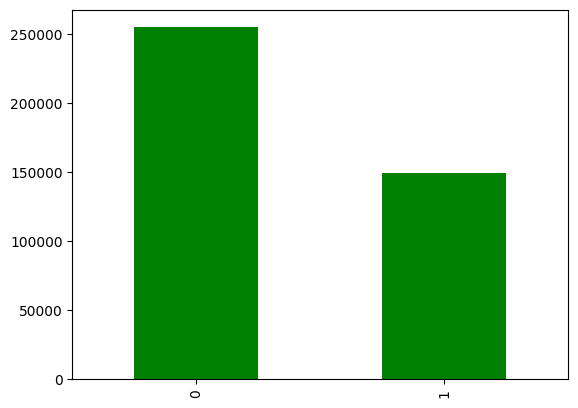

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
data['is_duplicate'].value_counts().plot(kind='bar', color='green')

In [5]:
data.shape

(404290, 6)

In [6]:
print(data.dtypes)
print(data['question1'].dtypes)
print(data['question2'].dtypes)
type(data['question1'])

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object
object
object


pandas.core.series.Series

# Setting target or labelfor each input

In [7]:
label_oneDimension=data['is_duplicate']

In [8]:
label_oneDimension.head(2)

0    0
1    0
Name: is_duplicate, dtype: int64

In [9]:
import numpy as np
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(data['is_duplicate'], num_classes=2)

In [10]:
label_twoDimension[0:1]

array([[1., 0.]], dtype=float32)

In [11]:
question_one=data['question1'].astype(str)
print(question_one.head())

0              What is the step by step guide to invest in share market in india?
1                             What is the story of Kohinoor (Koh-i-Noor) Diamond?
2       How can I increase the speed of my internet connection while using a VPN?
3                              Why am I mentally very lonely? How can I solve it?
4    Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Name: question1, dtype: object


In [12]:
question_two=data['question2'].astype(str)
print(question_two.head())

0                          What is the step by step guide to invest in share market?
1    What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) d...
2                        How can Internet speed be increased by hacking through DNS?
3                  Find the remainder when [math]23^{24}[/math] is divided by 24,23?
4                                            Which fish would survive in salt water?
Name: question2, dtype: object


# Fitting text on a single tokenized object

In [13]:
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(question_one+question_two)

In [14]:
vocabulary_all=len(tok_all.word_counts)
print(vocabulary_all)

89983


# Train data Sequencing and Encoding

In [15]:
#Encoding question 1
encoded_q1=tok_all.texts_to_sequences(question_one)
print(question_one[0])
encoded_q1[0]

What is the step by step guide to invest in share market in india?


[2, 3, 1, 1222, 59, 1222, 2566, 7, 579, 8, 763, 384, 8, 36]

In [16]:
#Encoding question 2
encoded_q2=tok_all.texts_to_sequences(question_two)
print(question_two[0])
encoded_q2[0]

What is the step by step guide to invest in share market?


[2, 3, 1, 1222, 59, 1222, 2566, 7, 579, 8, 763, 384]

# Pre-Padding on Train data

In [19]:
#####Padding encoded sequence of words
from keras.preprocessing import sequence
max_length=100
padded_docs_q1 = tf.keras.utils.pad_sequences(encoded_q1, maxlen=max_length, padding='pre')

In [20]:
#####Padding encoded sequence of words
from keras.preprocessing import sequence
max_length=100
padded_docs_q2 = tf.keras.utils.pad_sequences(encoded_q2, maxlen=max_length, padding='pre')

# Reading Embedding Vector from Glove

In [21]:
import os
import numpy as np

In [22]:
File= r"C:\Users\ankesh.anupam\OneDrive - Sval Energi\Desktop\UIS\Data_Mining_Deep_Learning\Project\GloVe\glove.42B.300d.txt"
embeddings_index = {}
f = open(File, 'r', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 1917494 word vectors.


In [23]:
#create embedding matrix

embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		# words not found in embedding index will be all-zeros.
		embedding_matrix[i] = embedding_vector

# Defining Input Shape for Model

In [24]:
Question1_shape= Input(shape=[max_length])
Question1_shape.shape

TensorShape([None, 100])

In [25]:
Question2_shape= Input(shape=[max_length])
Question2_shape.shape

TensorShape([None, 100])

# Bi-lstm Network

In [26]:
Bi_lstm2_network = Sequential()

# Adding Embedding layer
Bi_lstm2_network.add(Embedding(vocabulary_all+1,300,weights=[embedding_matrix], input_length=max_length, trainable=False))          

# Adding 2 Bi-Lstm layers
Bi_lstm2_network.add(Bidirectional(LSTM(32, return_sequences=True)))
Bi_lstm2_network.add(Dropout(0.2))

Bi_lstm2_network.add(Bidirectional(LSTM(64, return_sequences=False))) 
Bi_lstm2_network.add(Dropout(0.2))


# Adding Dense layer
Bi_lstm2_network.add(Dense(128,activation="linear"))
Bi_lstm2_network.add(Dropout(0.3))
                       
              

# Printing Model summary

In [27]:
Bi_lstm2_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          26995200  
                                                                 
 bidirectional (Bidirectiona  (None, 100, 64)          85248     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 64)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [28]:
from keras.utils.vis_utils import plot_model
plot_model(Bi_lstm2_network, to_file='Bi_lstm2_network.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# create siamese network from CNN model and store output feature vectors

In [29]:
Question1_Bi_lstm_feature=Bi_lstm2_network(Question1_shape)
Question2_Bi_lstm_feature=Bi_lstm2_network(Question2_shape)

# Adding and multiplying features obtained from Siamese CNN network

In [30]:
from keras import backend as K
from keras.optimizers import Adam

In [31]:
lamda_function=Lambda(lambda tensor:K.abs(tensor[0]-tensor[1]),name="Absolute_distance")
abs_distance_vector=lamda_function([Question1_Bi_lstm_feature,Question2_Bi_lstm_feature])

lamda_function2=Lambda(lambda tensor:K.abs(tensor[0]*tensor[1]),name="Hamadard_multiplication") #abs() returns absolute value
hamadard_vector=lamda_function2([Question1_Bi_lstm_feature,Question2_Bi_lstm_feature])

# Adding abs_distance_vector and hamadard_vector

In [32]:
from keras.layers import Add

In [33]:
added_vecotr = Add()([abs_distance_vector, hamadard_vector])

# Final Model prediction

In [34]:
predict=Dense(2,activation="sigmoid")(added_vecotr)

# Creating sequential model using Model() class and compilation

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
Siamese2_Network=Model(inputs=[Question1_shape,Question2_shape],outputs=predict)
Siamese2_Network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])

C:\Users\ankesh.anupam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [36]:
Siamese2_Network.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 sequential (Sequential)        (None, 128)          27163008    ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 Absolute_distance (Lambda)     (None, 128)          0           ['sequential[0][0]',         

# Setting hyperparameter for training

In [38]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)
#checkpointer = ModelCheckpoint(filepath = 'cnn_model_one_.{epoch:02d}-{val_loss:.6f}.hdf5',
 #                              verbose=1,
 #                              save_best_only=True, save_weights_only = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)

# Data split into train and validation set

In [39]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
q1_train, q1_val,q2_train, q2_val, label_train, label_val, label_oneD_train, label_oneD_val = train_test_split(padded_docs_q1,padded_docs_q2, label_twoDimension, label_oneDimension, test_size=0.30,
random_state=42)

# Model fitting or training

In [43]:
history = Siamese2_Network.fit([q1_train,q2_train],label_train,
                    batch_size=32,epochs=20,validation_data=([q1_val,q2_val],label_val),callbacks=[earlystopper, reduce_lr])

Epoch 1/20
8844/8844 [==============================] - 3119s 353ms/step - loss: 0.5734 - accuracy: 0.7044 - val_loss: 0.5687 - val_accuracy: 0.7101 - lr: 3.0000e-05
Epoch 2/20
8844/8844 [==============================] - 3780s 427ms/step - loss: 0.5497 - accuracy: 0.7224 - val_loss: 0.5473 - val_accuracy: 0.7240 - lr: 3.0000e-05
Epoch 3/20
8844/8844 [==============================] - 2917s 330ms/step - loss: 0.5366 - accuracy: 0.7319 - val_loss: 0.5397 - val_accuracy: 0.7332 - lr: 3.0000e-05
Epoch 4/20
8844/8844 [==============================] - 2859s 323ms/step - loss: 0.5262 - accuracy: 0.7396 - val_loss: 0.5253 - val_accuracy: 0.7380 - lr: 3.0000e-05
Epoch 5/20
8844/8844 [==============================] - 2912s 329ms/step - loss: 0.5178 - accuracy: 0.7451 - val_loss: 0.5234 - val_accuracy: 0.7373 - lr: 3.0000e-05
Epoch 6/20
8844/8844 [==============================] - 2952s 334ms/step - loss: 0.5115 - accuracy: 0.7493 - val_loss: 0.5143 - val_accuracy: 0.7445 - lr: 3.0000e-05
Epoc

KeyboardInterrupt: 

# Model Prediction

In [44]:
Siamese2_Network_predictions = Siamese2_Network.predict([q1_val,q2_val])

3791/3791 [==============================] - 468s 123ms/step


# Log loss

In [45]:
from sklearn.metrics import log_loss
log_loss_val= log_loss(label_val,Siamese2_Network_predictions)
log_loss_val

0.5011274365522674

# Classification report

In [46]:
predictions = np.zeros_like(Siamese2_Network_predictions)
predictions[np.arange(len(Siamese2_Network_predictions)), Siamese2_Network_predictions.argmax(1)] = 1


In [47]:
predictionInteger=(np.argmax(predictions, axis=1))
#print('np.argmax(a, axis=1): {0}'.format(np.argmax(predictions, axis=1)))
predictionInteger

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(label_val,predictions))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82     76350
           1       0.76      0.49      0.59     44937

   micro avg       0.75      0.75      0.75    121287
   macro avg       0.75      0.70      0.71    121287
weighted avg       0.75      0.75      0.74    121287
 samples avg       0.75      0.75      0.75    121287



In [49]:
from sklearn.metrics import precision_recall_fscore_support
print ("Precision, Recall, F1_score : macro ",precision_recall_fscore_support(label_oneD_val,predictionInteger, average='macro'))
print ("Precision, Recall, F1_score : micro ",precision_recall_fscore_support(label_oneD_val,predictionInteger, average='micro'))
print ("Precision, Recall, F1_score : weighted ",precision_recall_fscore_support(label_oneD_val,predictionInteger, average='weighted'))

Precision, Recall, F1_score : macro  (0.7538527919869207, 0.697653533982721, 0.7073898065136264, None)
Precision, Recall, F1_score : micro  (0.7521333696109228, 0.7521333696109228, 0.7521333696109228, None)
Precision, Recall, F1_score : weighted  (0.7530014417182193, 0.7521333696109228, 0.7370248226976395, None)


# Final train and val loss

In [50]:
min_val_loss = min(history.history["val_loss"])
min_train_loss = min(history.history["loss"])
max_val_acc = max(history.history["val_accuracy"])
max_train_acc = max(history.history["accuracy"])
print("min_train_loss=%g, min_val_loss=%g, max_train_acc=%g, max_val_acc=%g" % (min_train_loss,min_val_loss,max_train_acc,max_val_acc))

NameError: name 'history' is not defined

# Plot epoch Vs loss

In [51]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"],color = 'red', label = 'train_loss')
plt.plot(history.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 

NameError: name 'history' is not defined

# Plot Epoch Vs Accuracy

In [ ]:
plt.plot(history.history["accuracy"],color = 'red', label = 'train_accuracy')
plt.plot(history.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Area Under Curve- ROC

In [ ]:
#pred_test = Siamese2_Network.predict([padded_docs_q1_test,padded_docs_q2_test])
pred_train = Siamese2_Network.predict([q1_train,q2_train])
pred_val = Siamese2_Network.predict([q1_val,q2_val])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")

    # Plot of a ROC curve for a specific class


In [ ]:
plot_AUC_ROC(label_val,pred_val)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [ ]:
auc_val = roc_auc_score(label_val,pred_val)
accuracy_val = accuracy_score(label_val,pred_val>0.5)
auc_train = roc_auc_score(label_train,pred_train)
accuracy_train = accuracy_score(label_train,pred_train>0.5)

print("auc_train=%g, auc_val=%g, accuracy_train=%g, accuracy_val=%g" % (auc_train, auc_val, accuracy_train, accuracy_val))